# Arabic Handwritten Digits Recognition

**Context**

The motivation of this study is to use cross knowledge learned from multiple works to enhancement the performance of Arabic handwritten digits recognition. In recent years, Arabic handwritten digits recognition with different handwriting styles as well, making it important to find and work on a new and advanced solution for handwriting recognition. A deep learning systems needs a huge number of data (images) to be able to make a good decisions.

**Data**

The MADBase is modified Arabic handwritten digits database contains 60,000 training images, and 10,000 test images. MADBase were written by 700 writers. Each writer wrote each digit (from 0 -9) ten times, available in https://www.kaggle.com/mloey1/ahdd1.

Model Training can be carried out in kaggle notebooks (to avoid data uploading and downloading), as done in https://www.kaggle.com/fatemefateme/arabic-handwritten-digits-recognition 

# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier

import pickle
import os
# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

# Read Data

In [2]:
X_train = pd.read_csv('./input/csvTrainImages 60k x 784.csv',header=None )
y_train = pd.read_csv('./input/csvTrainLabel 60k x 1.csv',header=None)
X_test = pd.read_csv('./input/csvTestImages 10k x 784.csv',header=None)
y_test = pd.read_csv('./input/csvTestLabel 10k x 1.csv',header=None)
print('X_train : ',X_train .shape,', y_train', y_train.shape)
print('X_test  : ',X_test.shape,' , y_test ', y_test.shape)

X_train :  (60000, 784) , y_train (60000, 1)
X_test  :  (10000, 784)  , y_test  (10000, 1)


In [3]:
y_train.head(10)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


# Show number of samples for each class: 

In [4]:
y_train[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

# Check for null and missing values
 Check for corrupted images (missing values inside).

In [5]:
X_train.isna().sum().sum()

0

In [6]:
X_test.isnull().sum().sum()

0

There is no missing values in the train and test dataset. So we can safely go ahead.

# Normalize the data


In [7]:
X_train = X_train / 255.0
X_test = X_test   / 255.0

# Plot some traing data

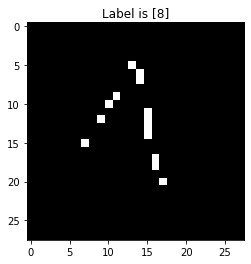

In [8]:
i=np.random.choice(len(X_train), replace = True)
pixels = np.array(X_train.loc[i].values, dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))
# Plot
label=y_train.loc[i].values
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels.T, cmap='gray',)
plt.show()

# Modeling

## Train the model and save it to disk


In [9]:
# filename = 'clf.sav'
# output_path='./output/'
# clf =ExtraTreesClassifier(n_estimators=100)
# clf=clf.fit(X_train,y_train)
# pickle.dump(clf, open(output_path+filename, 'wb')) 
# print('mission done!')

## load the model from disk


In [10]:
filename = 'clf.sav'
output_path='./output/'
clf = pickle.load(open(output_path+filename, 'rb'))
print('mission done!')

mission done!


In [11]:
Score_train = round(clf.score(X_train, y_train) * 100, 2)
Score_test= round(clf.score(X_test, y_test) * 100, 2) 
y_pred=clf.predict(X_test)
print('\x1B[1m\x1b[31m Score_train',Score_train)
print('\x1B[1m\x1b[31m Score_test',Score_test)

 Score_train 100.0
 Score_test 98.5


# Plot predicted results

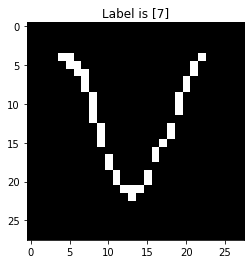

In [18]:
i=np.random.choice(len(y_test), replace = True)
pixels = np.array(X_test.loc[i].values, dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
label=y_test.loc[i].values
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels.T, cmap='gray',)
plt.show()

# Let's Find the errors.


In [13]:
y_true=np.array(y_test[0])
errors = (y_pred-y_true!= 0)
Y_pred_errors = y_pred[errors]
Y_true_errors = y_true[errors]
X_errors = X_test[errors]
df_errors= pd.DataFrame({"True Label":Y_true_errors,"Predicted Label":Y_pred_errors})
print("Number of errors in test data = ",len(df_errors), ', as follows: ')
df_errors.head()

Number of errors in test data =  150 , as follows: 


,True Label,Predicted Label
0,3,2
1,0,5
2,0,5
3,6,1
4,9,4


# Plot errors 

Sample  147 :


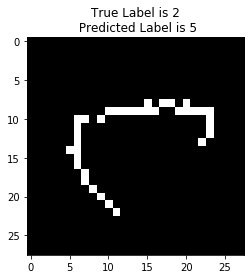

In [20]:
i=np.random.choice(len(df_errors), replace = True)
print('Sample ', i,':')
pixels = np.array(X_errors.iloc[i].values, dtype='uint8')
# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
label1=Y_true_errors[i]
label2=Y_pred_errors[i]

plt.title('True Label is {label}'.format(label=label1)+'\n Predicted Label is {label}'.format(label=label2))
plt.imshow(pixels.T, cmap='gray',)
plt.show()